In [125]:
%matplotlib inline
import pviz as pz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
no2 = pz.Pollutant("data/NO2_2003_2017.csv", "NO2")

In [141]:
df = no2.getStationDF('Bratislava, Trnavské Mýto').set_index('dtvalue')
poll_2013_8 = df.loc[(df.index.month==8) & (df.index.year==2013),'Bratislava, Trnavské Mýto']
print("aug 2013 data:\n{}".format(poll_2013_8.head()))

aug 2013 data:
dtvalue
2013-08-01 00:00:00     9.125976
2013-08-01 01:00:00     8.464424
2013-08-01 02:00:00    14.609592
2013-08-01 03:00:00    25.509904
2013-08-01 04:00:00    37.054560
Name: Bratislava, Trnavské Mýto, dtype: float64


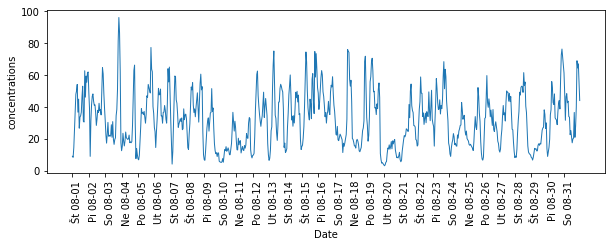

In [158]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=poll_2013_8.index.min(), end=poll_2013_8.index.max(),
                       freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(poll_2013_8, linewidth=1)
plt.xlabel("Date")
plt.ylabel("concentrations")
plt.show()

In [175]:

n_train = round(0.75*len(poll_2013_8))

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(15, 3))
    plt.xticks(range(0, len(X_train)+len(X_test), 24), xticks.strftime("%a %m-%d"), rotation=90,
               ha="left")
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Concentrations")

Test-set R^2: 0.04


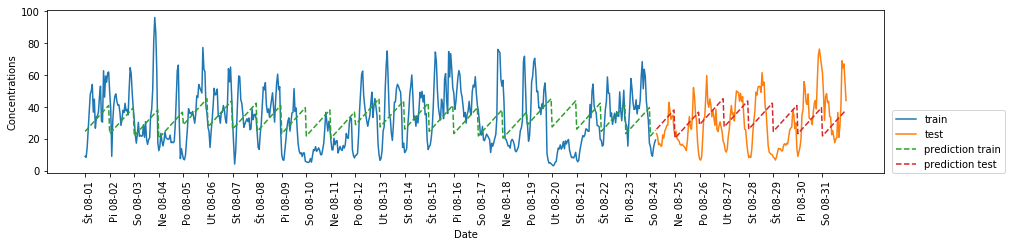

In [176]:
from sklearn.linear_model import LinearRegression
x_hour_week = np.hstack([poll_2013_8.index.dayofweek.values.reshape(-1, 1),
                         poll_2013_8.index.hour.values.reshape(-1, 1)])
y = poll_2013_8.values
eval_on_features(x_hour_week, y, LinearRegression())

Test-set R^2: -0.01


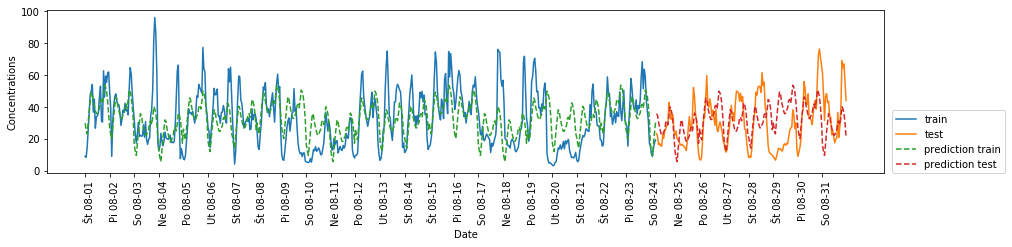

In [177]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
enc = OneHotEncoder()
x_hour_week_hot = enc.fit_transform(x_hour_week).toarray()
eval_on_features(x_hour_week_hot, y, Ridge())

Test-set R^2: 0.08


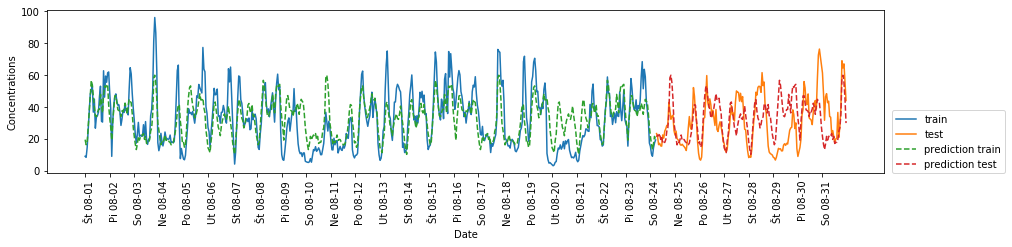

In [182]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_hot_poly = poly_transformer.fit_transform(x_hour_week_hot)
lr = Ridge()
eval_on_features(X_hour_week_hot_poly, y, lr)